In [263]:
from skimage.io import imread, imshow, imsave
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, skeletonize
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from scipy.signal import convolve2d
import numpy as np

In [76]:
import matplotlib.pyplot as plt
def compare_img(img1, img2, label1 = '', label2 = ''):
    fig = plt.figure(figsize=(15, 10))
    
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.colorbar().remove()
    plt.title(label1)
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.colorbar().remove()
    plt.title(label2)
    
    plt.show()

def show_img(img, label = ''):
    imshow(img)
    plt.axis('off')
    plt.title(label)
    
def save_img(img, filename):
    imsave(filename, img)

In [8]:
img1 = imread('1.png')
img2 = imread('2.png')
img3 = imread('3.png')
img4 = imread('4.png')
img5 = imread('5.png')
img6 = imread('6.jpg')
img7 = imread('7.png')
img8 = imread('8.png')
img9 = imread('9.png')

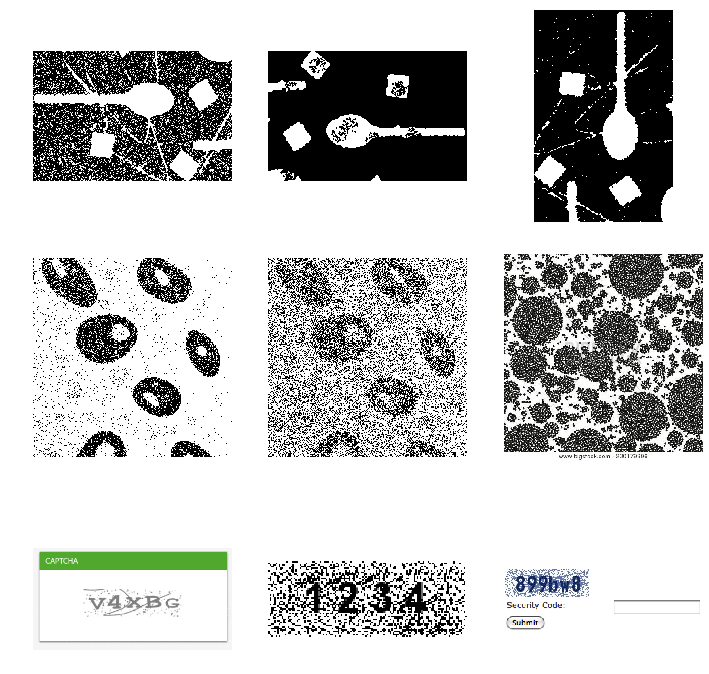

In [14]:
fig = plt.figure(figsize=(10, 10))
    
fig.add_subplot(3, 3, 1)
imshow(img1)
plt.axis('off')

fig.add_subplot(3, 3, 2)
imshow(img2)
plt.axis('off')

fig.add_subplot(3, 3, 3)
imshow(img3)
plt.axis('off')

fig.add_subplot(3, 3, 4)
imshow(img4)
plt.axis('off')

fig.add_subplot(3, 3, 5)
imshow(img5)
plt.axis('off')

fig.add_subplot(3, 3, 6)
imshow(img6)
plt.axis('off')

fig.add_subplot(3, 3, 7)
imshow(img7)
plt.axis('off')

fig.add_subplot(3, 3, 8)
imshow(img8)
plt.axis('off')

fig.add_subplot(3, 3, 9)
imshow(img9)
plt.axis('off')

plt.show()

## Найти внутренние и внешние границы изображений 1 – 3 (шум удалить).

In [201]:
def calculate_error(img, selem=False, mode='erosion'):
    if mode == 'erosion':
        img_er_bin = binary_erosion(img, selem=np.ones(selem)) if selem else binary_erosion(img)
    elif mode == 'dilation':
        img_er_bin = binary_dilation(img, selem=np.ones(selem)) if selem else binary_dilation(img)
    elif mode == 'closing':
        img_er_bin = binary_closing(img, selem=np.ones(selem)) if selem else binary_closing(img)
    elif mode == 'opening':
        img_er_bin = binary_opening(img, selem=np.ones(selem)) if selem else binary_opening(img)
    img_er = np.ones(img_er_bin.shape)
    return img_er*img_er_bin

In [33]:
img1_er = calculate_error(rgb2gray(img1), (6,6))
img1_er_er = calculate_error(img1_er)

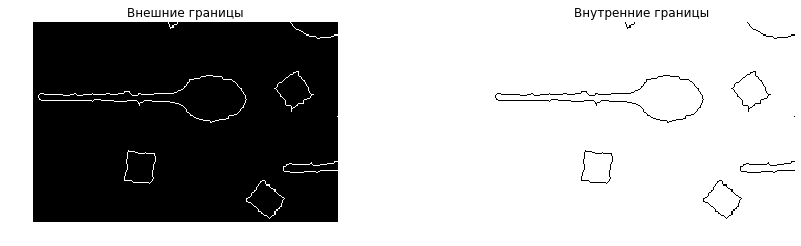

In [77]:
compare_img(img1_er-img1_er_er, img1_er_er-img1_er, 'Внешние границы', 'Внутренние границы')

In [40]:
img2_er = calculate_error(rgb2gray(img2), (4,4))
img2_er_er = calculate_error(img2_er)

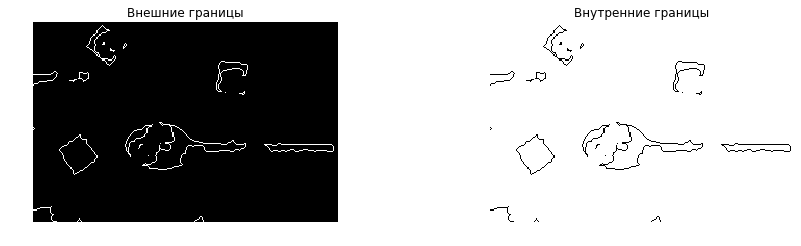

In [78]:
compare_img(img2_er-img2_er_er, img2_er_er-img2_er, 'Внешние границы', 'Внутренние границы')

In [43]:
img3_er = calculate_error(rgb2gray(img3), (7,7))
img3_er_er = calculate_error(img3_er)

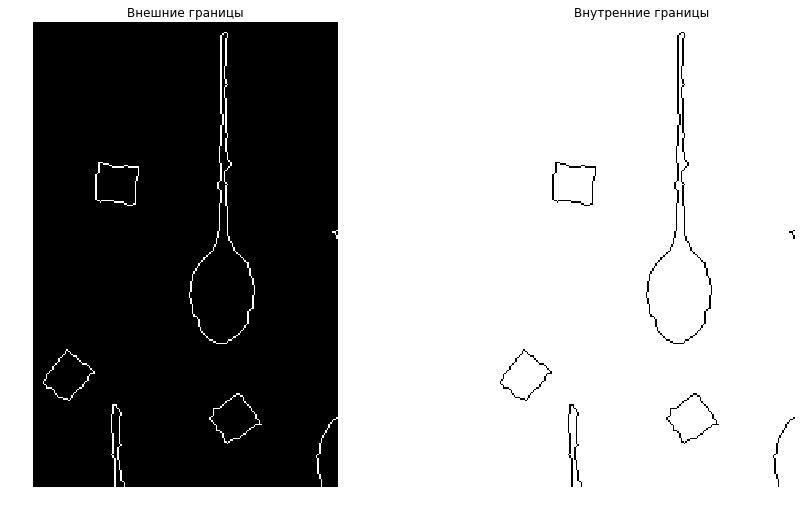

In [79]:
compare_img(img3_er-img3_er_er, img3_er_er-img3_er, 'Внешние границы', 'Внутренние границы')

## Удалить шум с изображений 4-6.

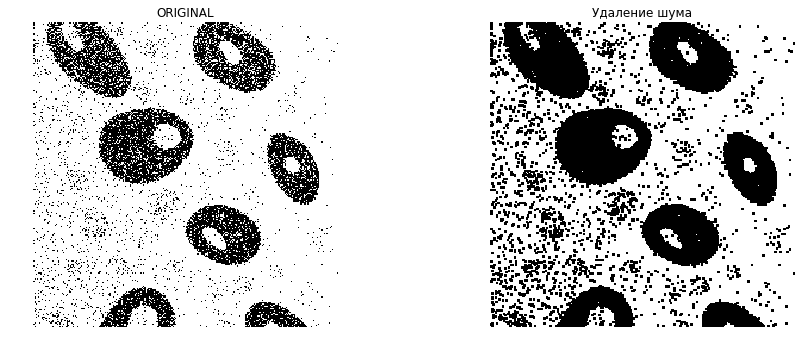

In [115]:
compare_img(img4, calculate_error(rgb2gray(img4), (4,4)), 'ORIGINAL', 'Удаление шума')

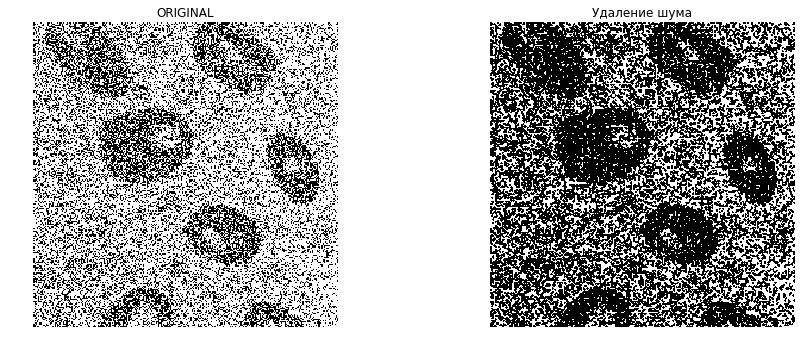

In [116]:
compare_img(img5, calculate_error(rgb2gray(img5)), 'ORIGINAL', 'Удаление шума')

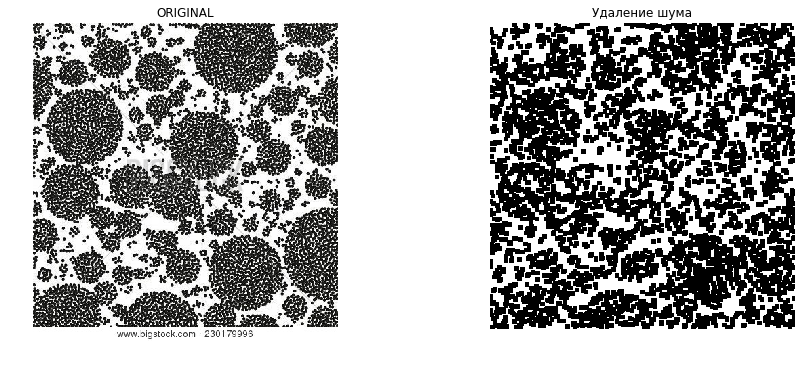

In [142]:
compare_img(img6, calculate_error(rgb2gray(img6), (7,7)), 'ORIGINAL', 'Удаление шума')

## Убрать шум с капч 7-9.

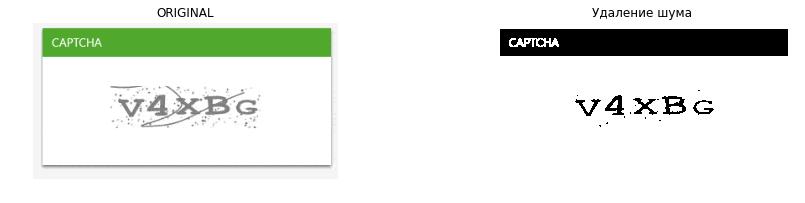

In [189]:
compare_img(img7, calculate_error(rgb2gray(img7)>0.6, mode='closing'), 'ORIGINAL', 'Удаление шума')

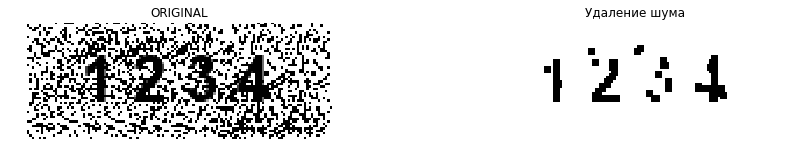

In [242]:
compare_img(img8, calculate_error(rgb2gray(img8), (3,3), mode='closing'), 'ORIGINAL', 'Удаление шума')

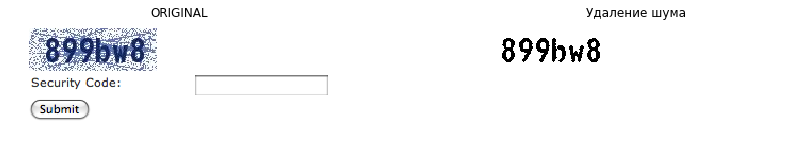

In [233]:
compare_img(img9, calculate_error(rgb2gray(img9)>0.3, mode='closing'), 'ORIGINAL', 'Удаление шума')

***

С уважением, студент гр. РИМ-181226

Кабанов Е.А.